In [3]:
import numpy as np
import awkward as ak
import uproot

import hist
from topcoffea.modules.histEFT import HistEFT
import topcoffea.modules.utils as utils

import mplhep as hep
import matplotlib.pyplot as plt
import os

In [4]:
hep.style.use("CMS")
params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
          'legend.fontsize':20, 
          'lines.markersize':5}
plt.rcParams.update(params)

In [3]:
# wc_lst = utils.get_list_of_wc_names("/cms/cephfs/data/store/user/hnelson2/mc/NanoGen/tW_stpt_tests/NanoGen_tW_orig/nanoGen_402.root")

# Event Weight Plots

In [4]:
new1_eventweights=utils.get_hist_from_pkl("../tW_new1_eventweights.pkl.gz", allow_empty=False)
new2_eventweights=utils.get_hist_from_pkl("../tW_new2_eventweights.pkl.gz", allow_empty=False)

In [5]:
# hists_orig = utils.get_hist_from_pkl("../tW_orig_eventweights.pkl.gz", allow_empty=False)
# hists_small = utils.get_hist_from_pkl("../tW_small_eventweights.pkl.gz", allow_empty=False)
# hists_medium = utils.get_hist_from_pkl("../tW_medium_eventweights.pkl.gz", allow_empty=False)
# hists_large = utils.get_hist_from_pkl("../tW_large_eventweights.pkl.gz", allow_empty=False)
# outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/event_weights/"

In [6]:
outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/"

plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/weights_SM.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/weights_SM_log.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/weights_pt1_log.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/weights_pt2_log.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/weights_pt3_log.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/weights_pt4_log.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/weights_new1_log.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/weights_new2_log.pdf


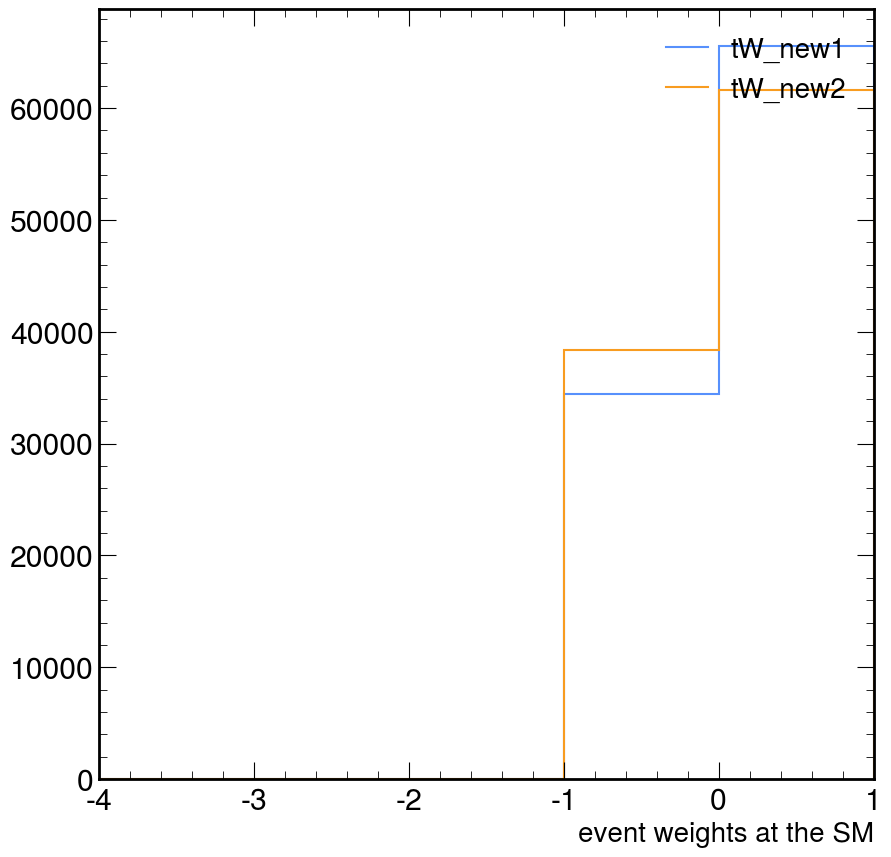

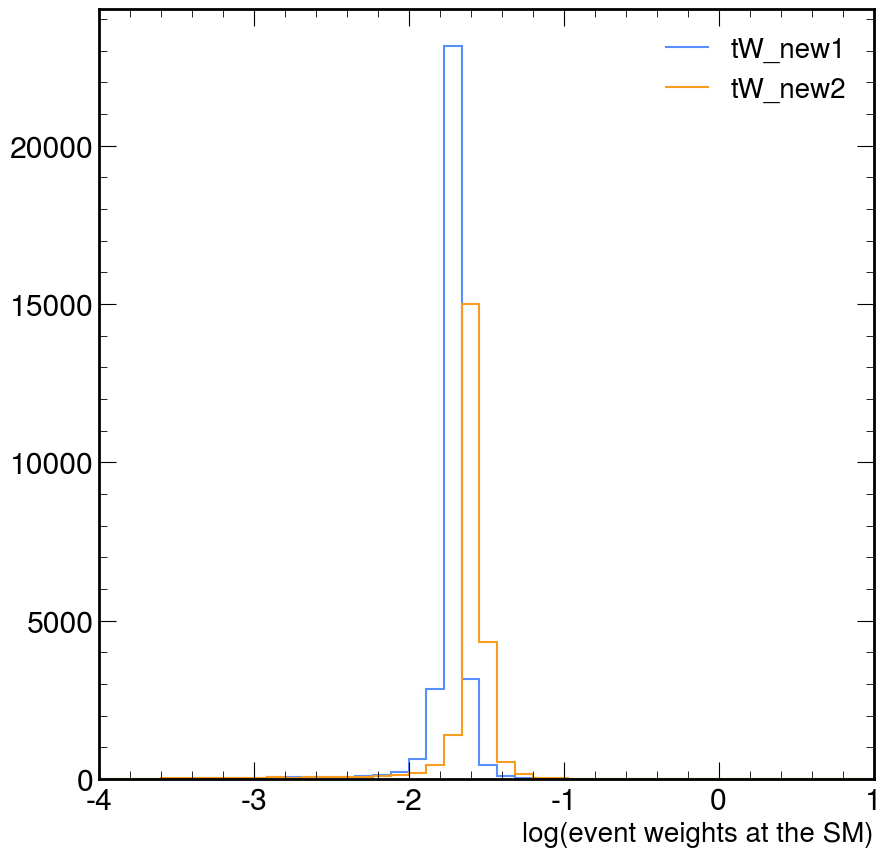

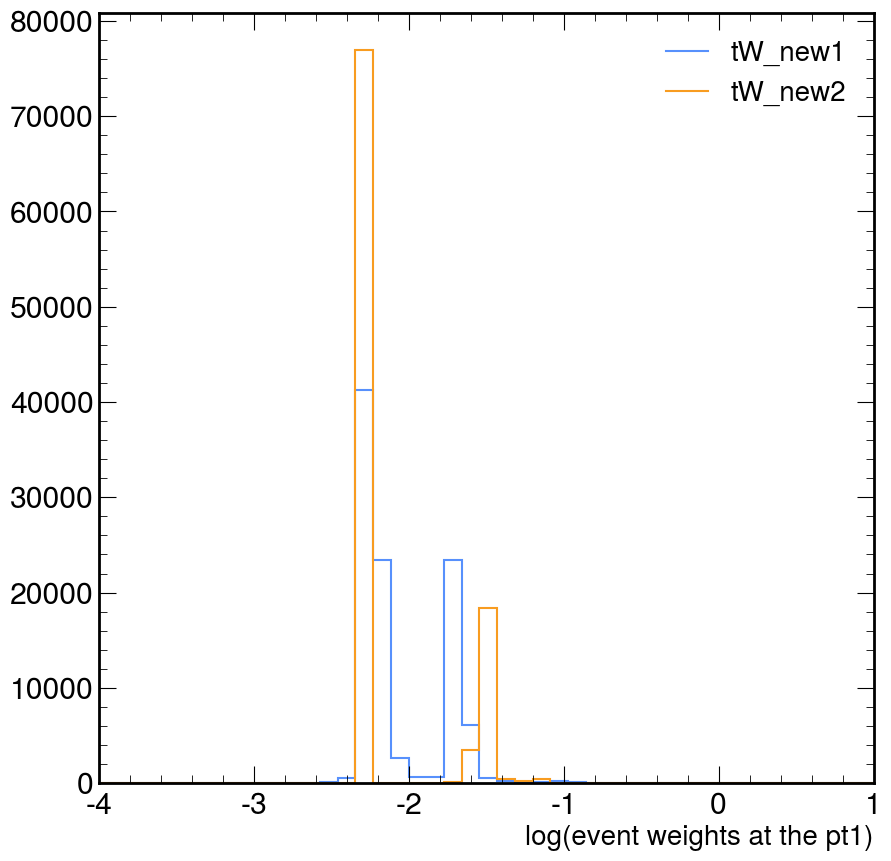

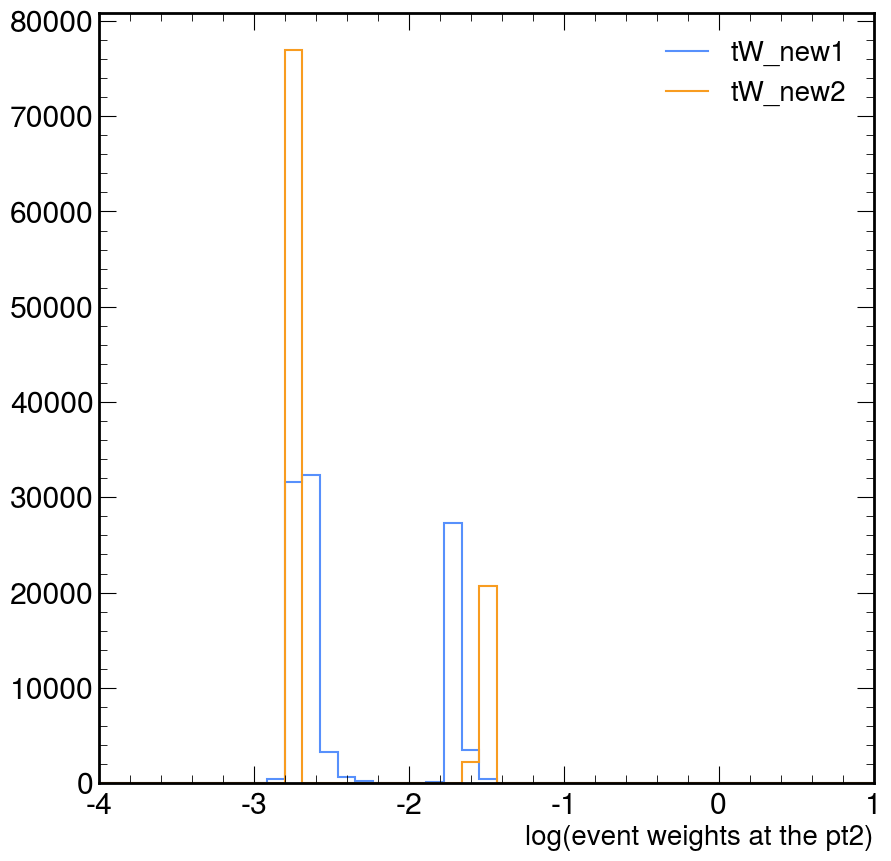

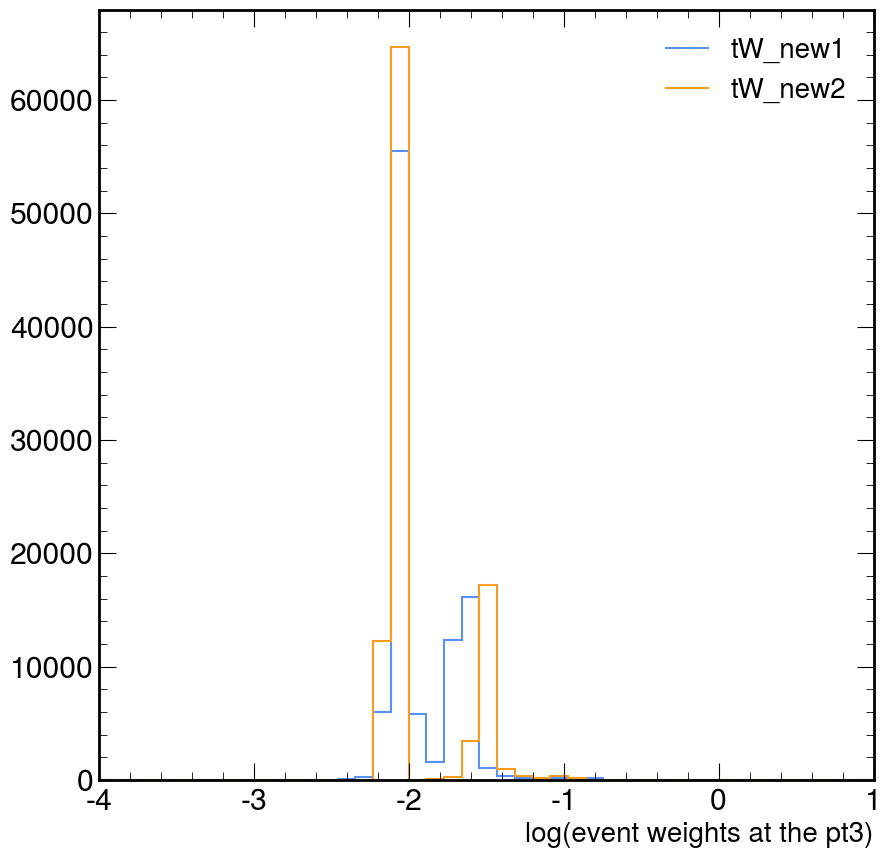

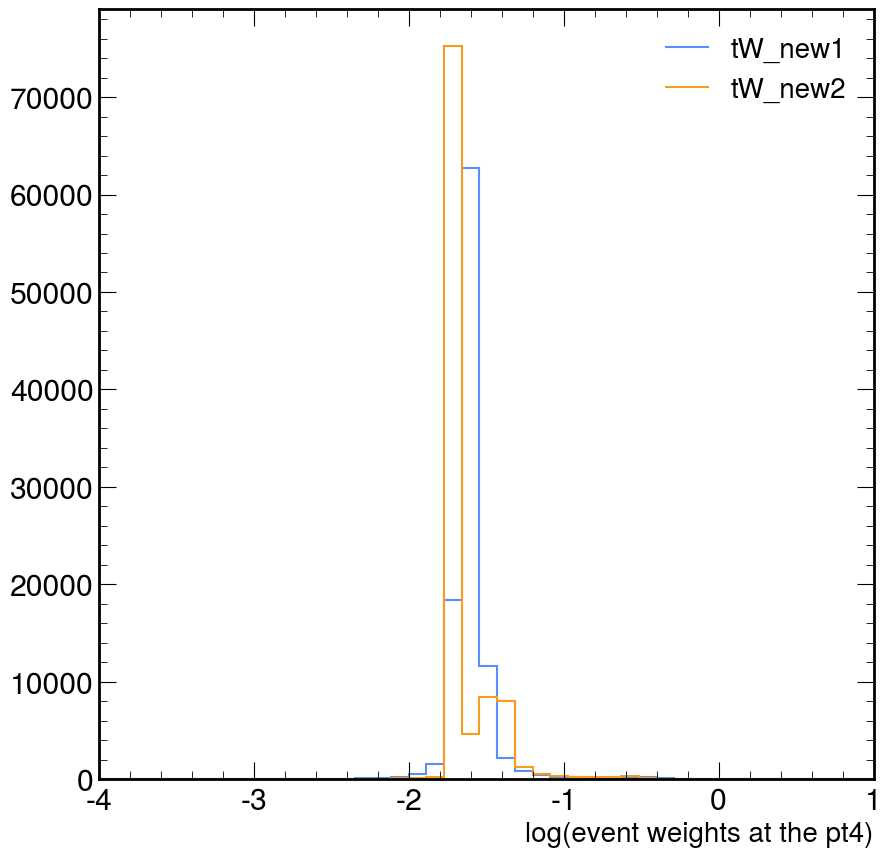

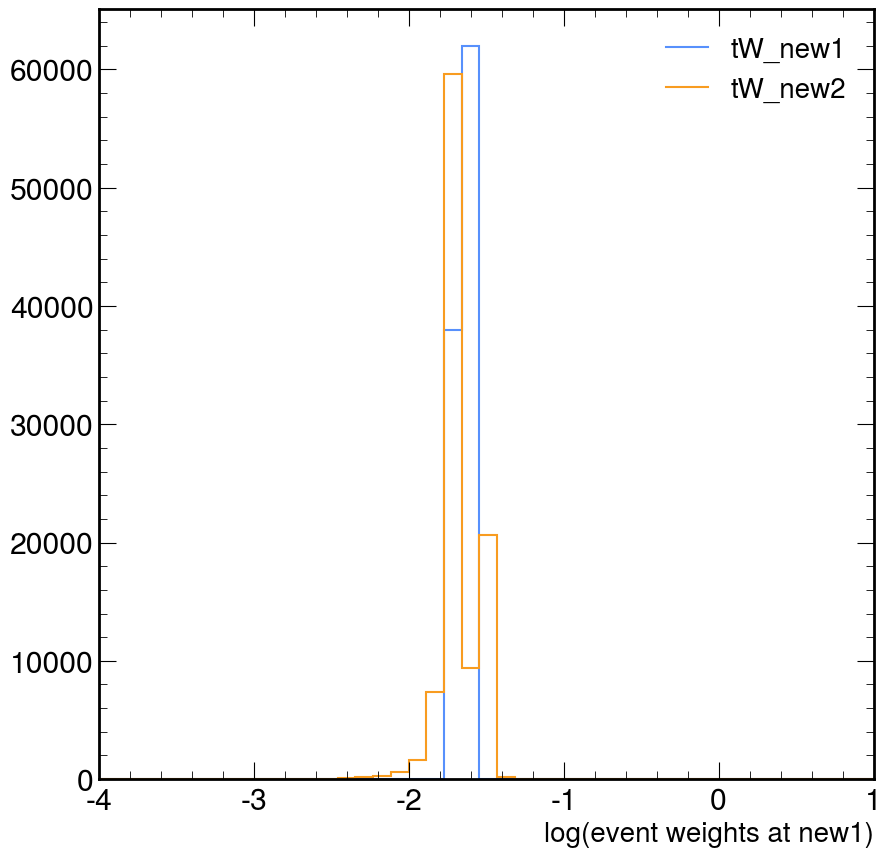

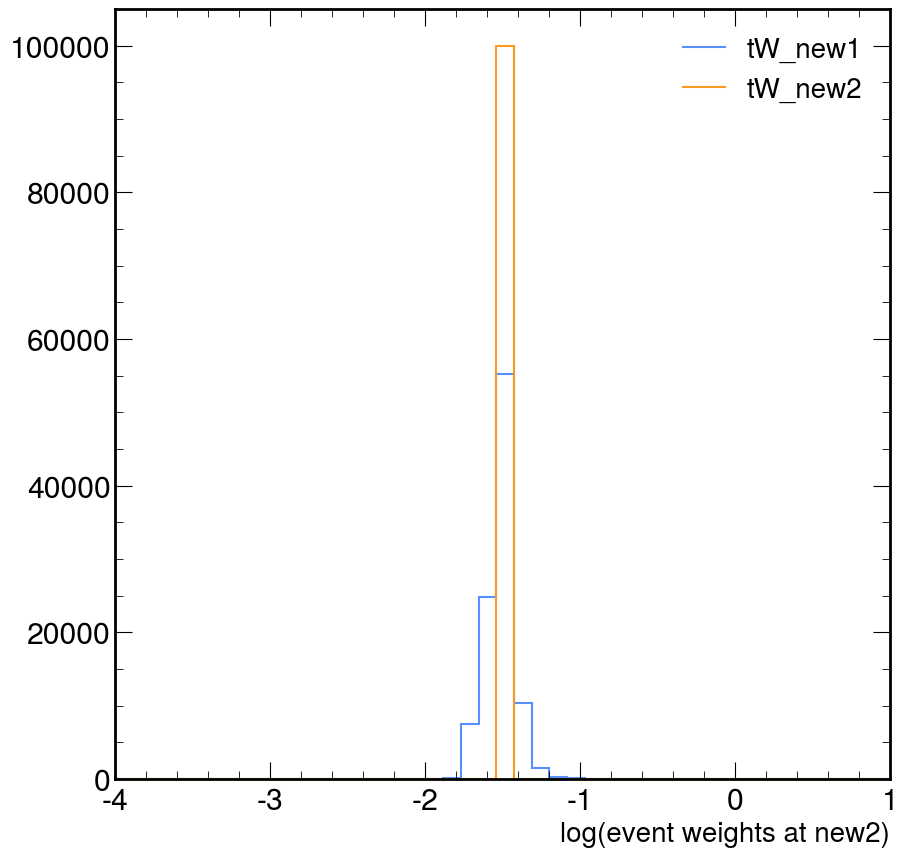

In [69]:
for h in new1_eventweights: 
    fig, ax = plt.subplots()
    new1_eventweights[h].plot1d(ax=ax, stack=False, yerr=False, label="tW_new1")
    new2_eventweights[h].plot1d(ax=ax, stack=False, yerr=False, label="tW_new2")
    ax.legend(loc='upper right')
    ax.set_xlim([-4, 1])
    outname = os.path.join(outpath, f"{h}.pdf")
    fig.savefig(outname)
    print(f'plot saved to {outname}')

# Kinematic Plots

In [20]:
new1_kin = utils.get_hist_from_pkl("../tW_new1_kin.pkl.gz", allow_empty=False)
new2_kin = utils.get_hist_from_pkl("../tW_new2_kin.pkl.gz", allow_empty=False)
powheg_kin = utils.get_hist_from_pkl("../tW_powheg_kin.pkl.gz", allow_empty=False)

new1_mt2 = utils.get_hist_from_pkl("../tW_new1_mt2.pkl.gz", allow_empty=False)

tWtop_powheg_kin = utils.get_hist_from_pkl("../tWtop_powheg_kin.pkl.gz", allow_empty=False)
tWantitop_powheg_kin = utils.get_hist_from_pkl("../tWantitop_powheg_kin.pkl.gz", allow_empty=False)

In [53]:
outpath = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/"

In [62]:
hSM = new1_mt2['mt2'].as_hist({})
h1 = new1_mt2['mt2'].as_hist({'cQl3':1.0})
# h2 = new1_mt2['mt2'].as_hist({'cleQt1Re':10.0})

/tmp/ipykernel_3978216/3849821266.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


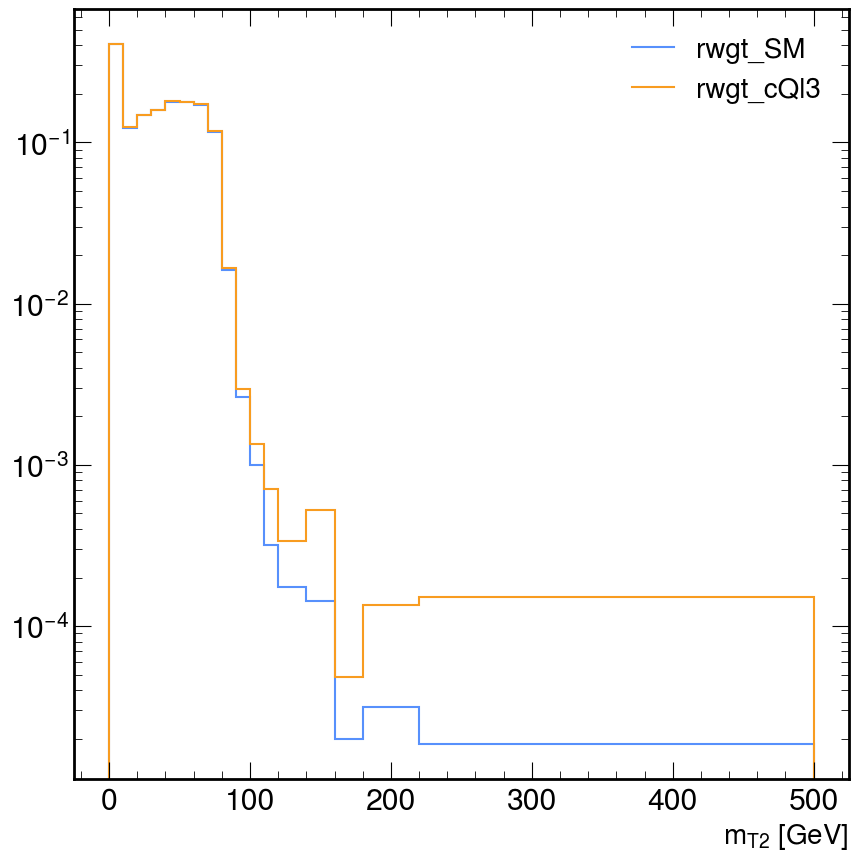

In [63]:
# h1 = new1_mt2['mt2'].as_hist({})
fig, ax = plt.subplots()
hSM.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="rwgt_SM")
h1.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="rwgt_cQl3")
# h2.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="rwgt_cleQt1Re")
ax.legend(loc='upper right')
ax.set_yscale('log')

fig.show()

In [54]:
"""
Create a dictionary of histograms that are two existing histEFTs summed together bin-wise. 
The StrCategory axis is not saved. 
"""
powheg_SM_hists = {}

rwgt = {}
for name in tWtop_powheg_kin: 
    # save the 2 powheg histEFTs at the SM point
    h1 = tWtop_powheg_kin[name].as_hist(rwgt) 
    h2 = tWantitop_powheg_kin[name].as_hist(rwgt)
    # require the axes (regular axis) are identical between h1 and h2
    assert h1.axes[1] == h2.axes[1], f"Axes are different. h1.axes[1] = {h1.axes[1]}, h2.axes[2]={h2.axes[1]}"
    # save the axis from one of the histograms (from above, they are identical between the two) 
    ax1 = h1.axes[1]
    # save the bin values for each histogram
    val1 = h1.values()
    val2 = h2.values() 
    # add val1 and val2 together such that the result is the corresponding bins from h1 and h2 added 
    sum1 = np.sum([val1, val2], axis=0)
    # get the number of bins in the original historgam (different for different variables) 
    nbins = len(ax1.widths)

    # create new, empty histogram with the 
    h_temp = hist.Hist(ax1)
    h_temp[0:nbins]=sum1[0]

    powheg_SM_hists[name]=h_temp

plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/njets_SM.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/nleps_SM.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/ntops_SM.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/mll_SM.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/dr_leps_SM.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/l0pt_SM.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/tops_pt_SM.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/avg_top_pt_SM.pdf
plot saved to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/new_event_weights/sow_SM.pdf


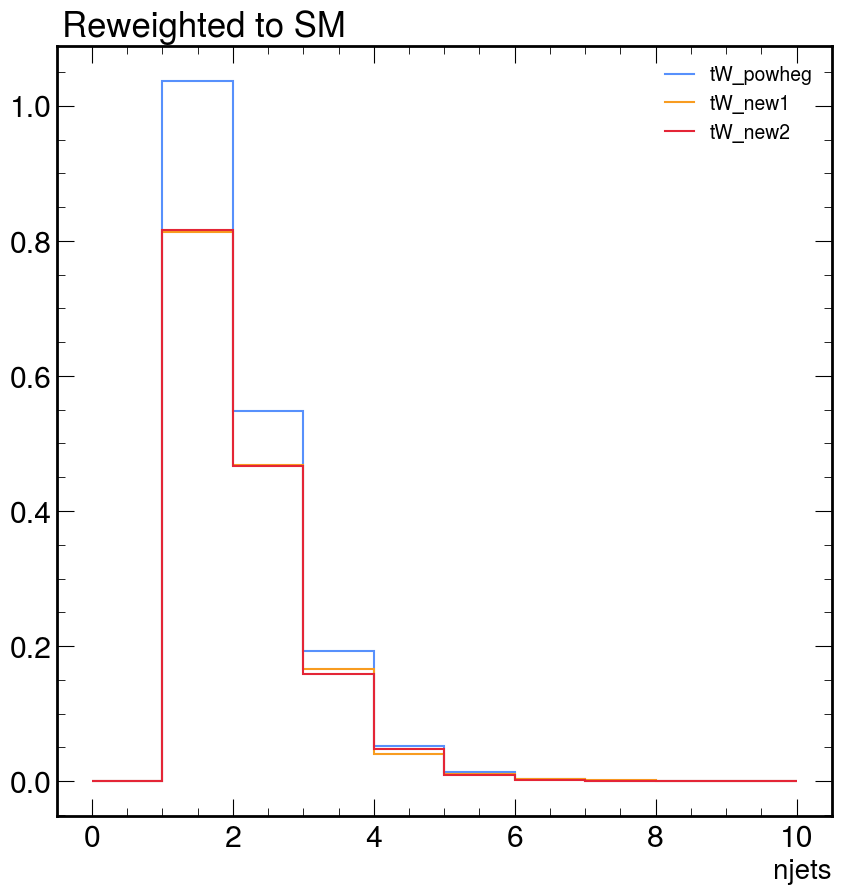

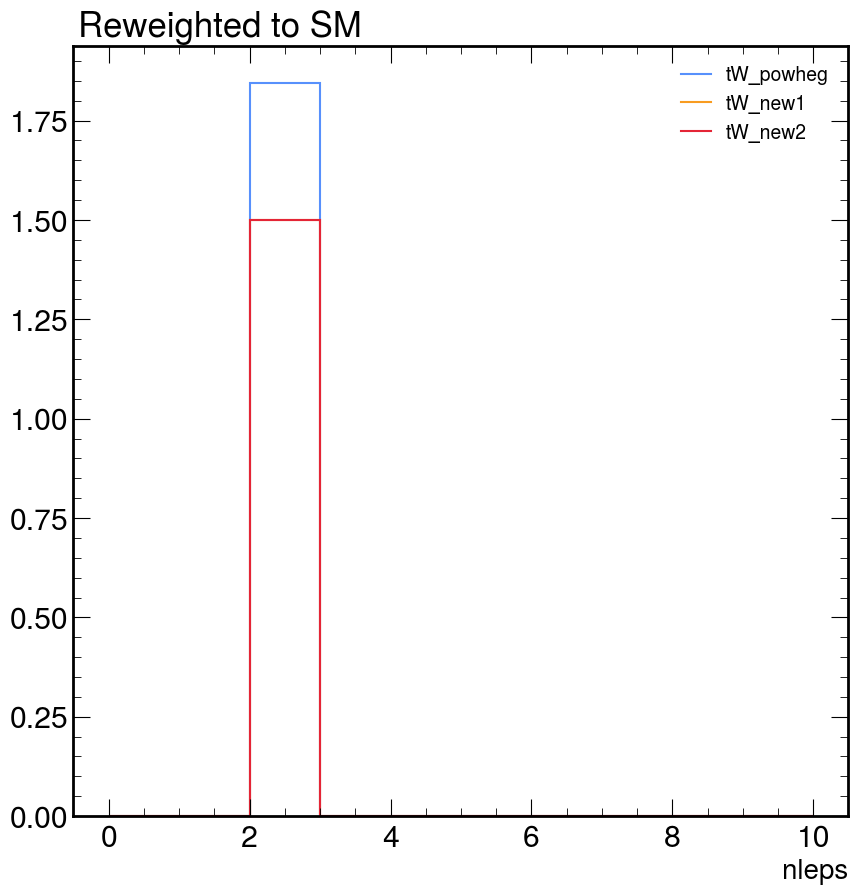

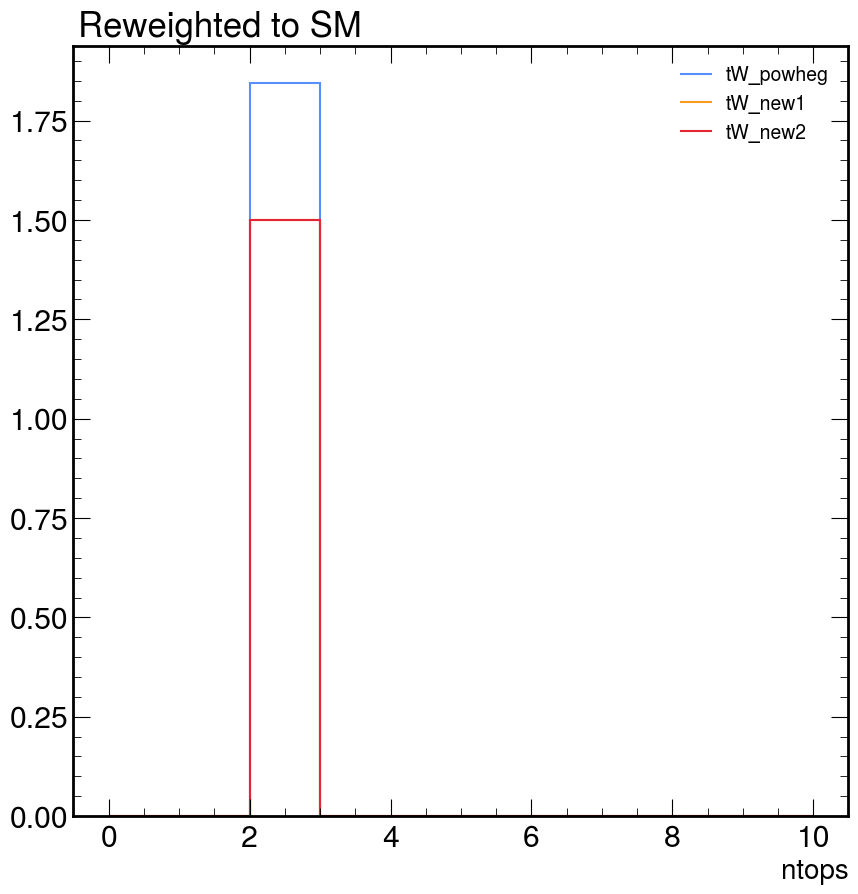

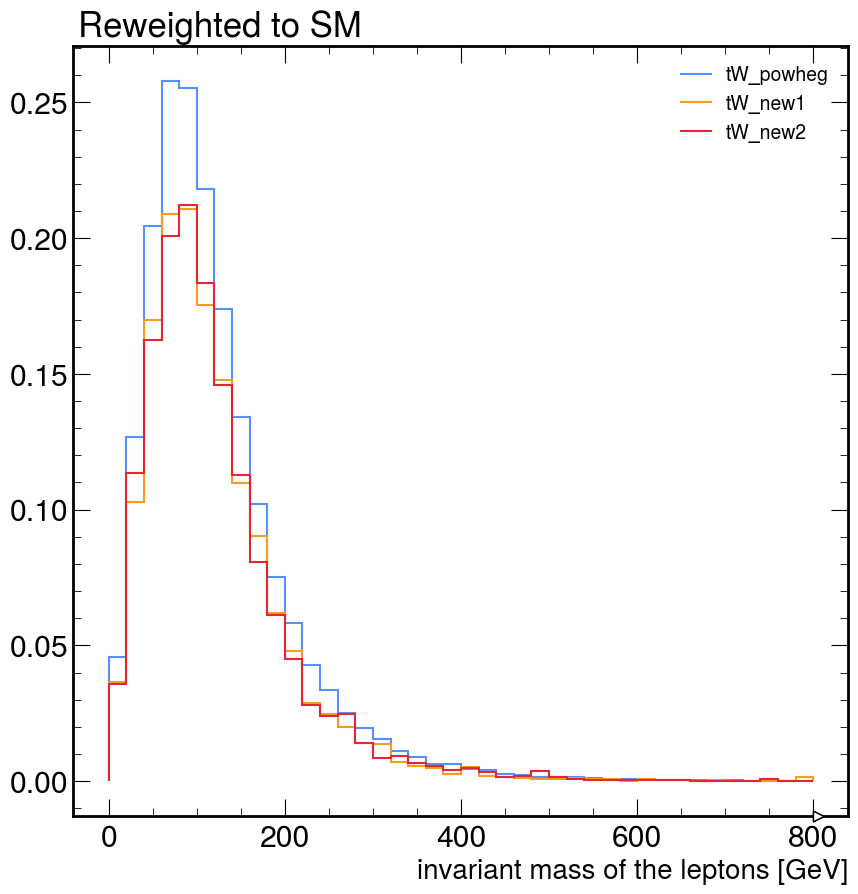

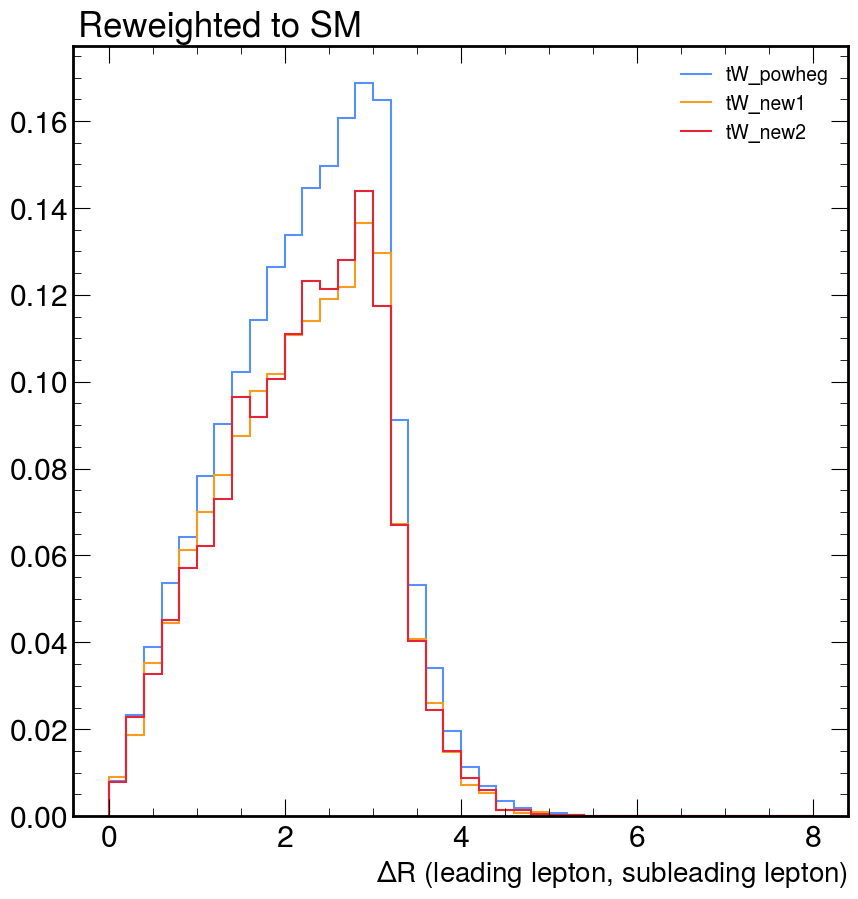

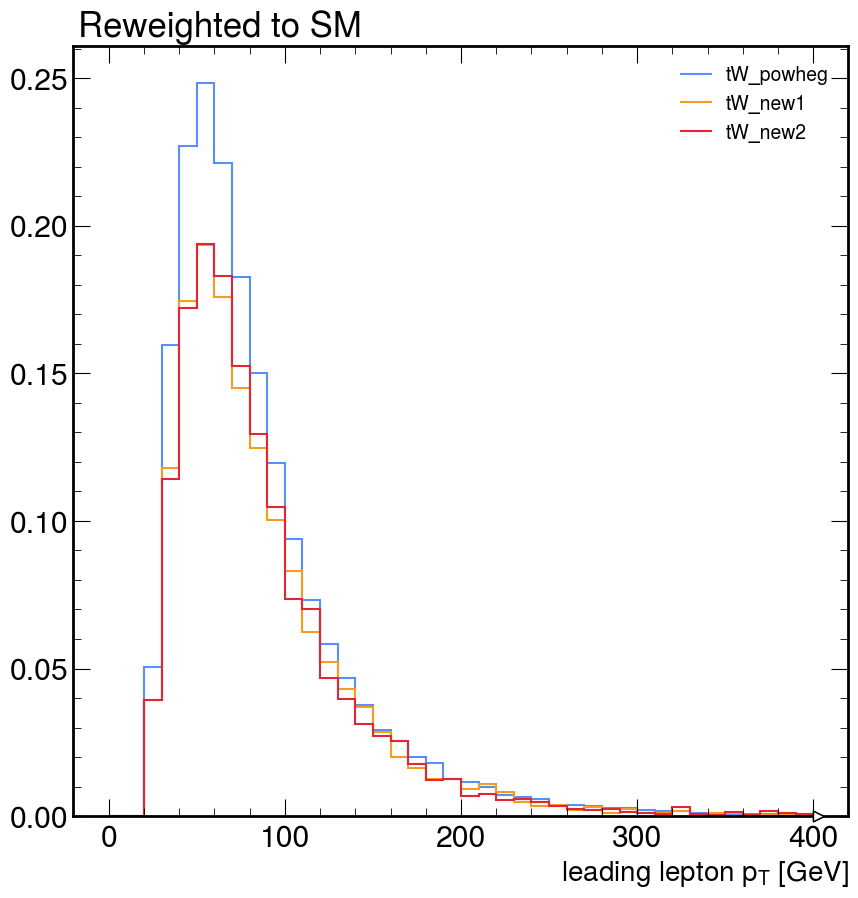

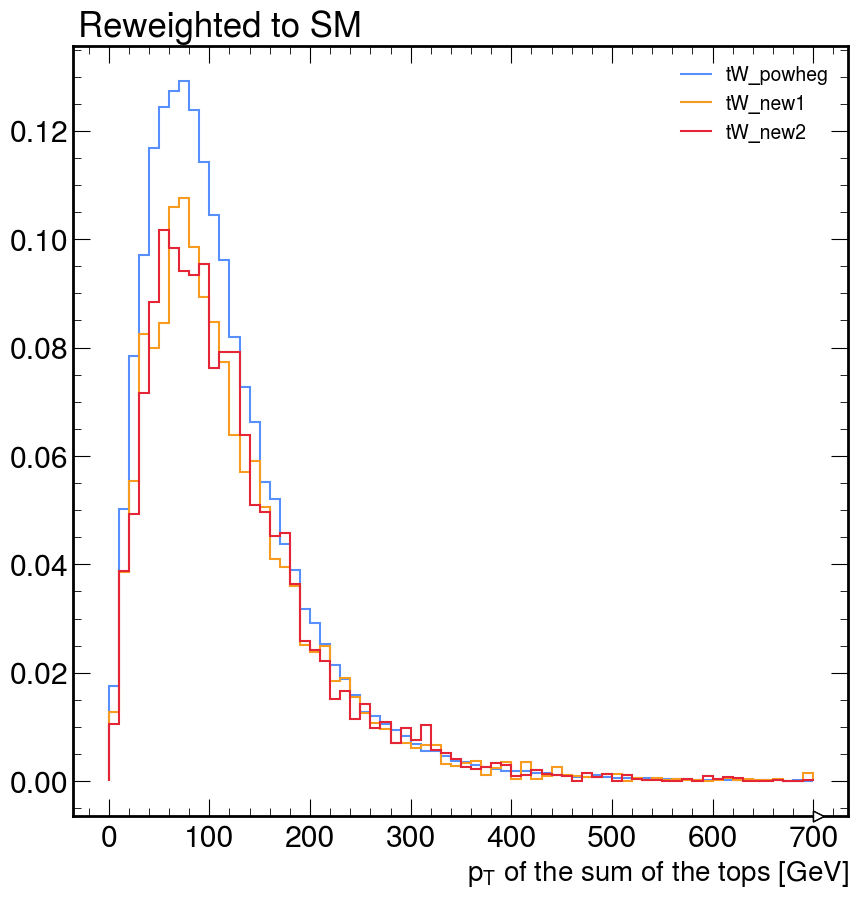

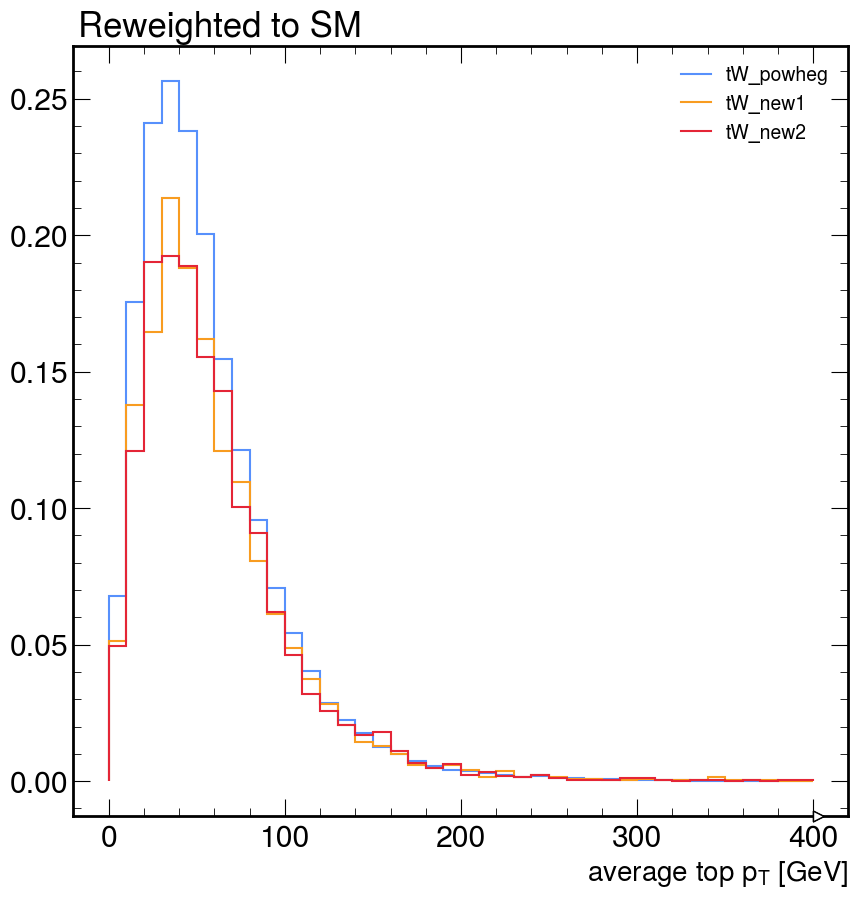

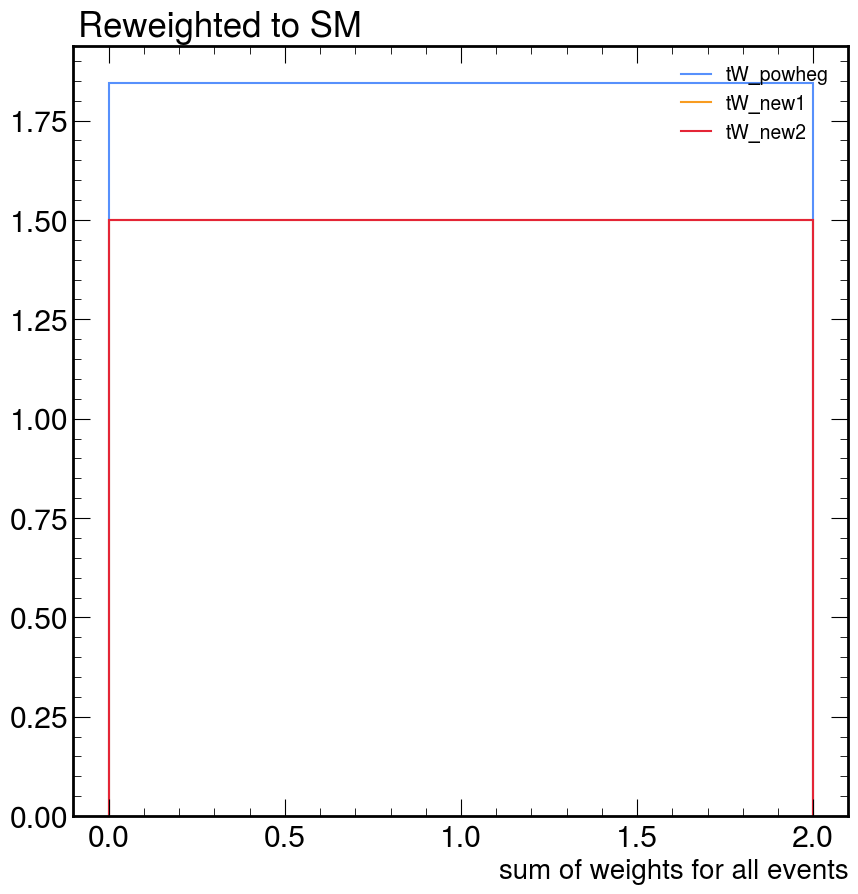

In [66]:
SM = {}
for h in new1_kin:
    h_new1 = new1_kin[h].as_hist(SM)
    h_new2 = new2_kin[h].as_hist(SM)
    h_powheg = powheg_SM_hists[h]
    
    fig, ax = plt.subplots()
    h_powheg.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW_powheg")
    h_new1.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW_new1")
    h_new2.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW_new2")
    ax.legend(loc='upper right', fontsize=14)
    plt.figtext(0.13, 0.89, "Reweighted to SM", fontsize=25)
    
    outname = os.path.join(outpath, f"{h}_SM.pdf")    
    fig.savefig(outname)
    print(f'plot saved to {outname}')

In [15]:
SM = {}
for h in new1_kin:
    h_new1 = new1_kin[h].as_hist(SM)
    h_new2 = new2_kin[h].as_hist(SM)
    h_powheg = powheg_SM_hists[h]
    
    fig, ax = plt.subplots()
    h_powheg.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW_powheg", density=True)
    h_new1.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW_new1", density=True)
    h_new2.plot1d(histtype="step", ax=ax, stack=False, yerr=False, label="tW_new2", density=True)
    ax.legend(loc='upper right', fontsize=14)
    plt.figtext(0.13, 0.89, "Reweighted to SM", fontsize=25)
    ax.set_xscale('log')
    
    # outname = os.path.join(outpath, f"{h}_norm1_SM.pdf")    
    # fig.savefig(outname)
    # print(f'plot saved to {outname}')

NameError: name 'powheg_SM_hists' is not defined

# 1D Quad EFT Parameterization Plots

# 1D Quad EFT Parameterization Plots

In [10]:
import plotting_tools_histEFT as plotTools
import os

In [11]:
standAlone = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_frozen_xsec.txt")

In [12]:
# gridpack = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_gridpack_xsec.txt")
gridpack = plotTools.read_MGstandalone_txt("/afs/crc.nd.edu/user/h/hnelson2/mc_production/standAloneMG/tW_gridpack_xsec_frozen.log")

In [13]:
def make_scatter_list_oneWC(scatter_dict, norm, norm_uncert):
	'''
	scatter_dict must be a single entry dictionary, with only the information for a single WC
	'''
	scatter_xvals = scatter_dict[0]
	scatter_yvals = np.divide(np.array(scatter_dict[1]), norm)
	scatter_sigma = np.array(scatter_dict[2])
	sigma_y = np.multiply(scatter_yvals, (np.sqrt(np.add(np.square(np.divide(scatter_sigma, scatter_dict[1])),np.square(np.divide(norm_uncert, norm))))))

	return [scatter_xvals, scatter_yvals, sigma_y]

In [14]:
def make_samples_dict(file, wc_name, sample_names=None, hist_name='sow_norm', wc_max=6.0):
	
    samples = {}

    # for fname in files: 
    #     if sample_names is not None:
    #         label = sample_names[fname]
    #     elif fname.endswith('.pkl.gz'):
    #         label = fname[:-7]
    #     else: 
    #         label = fname

    if wc_name == 'ctGRe' or wc_name == 'ctGIm':
        wc_range = np.arange(-1.5, 1.5, 0.2)
    else:
        wc_range = np.arange(-wc_max, wc_max+0.5, 0.5)
    h = plotTools.get_single_hist(file, hist_name)
    norm = h.as_hist({}).values()[0] #get SM xsec of the sample and use this for normalization
    weights = plotTools.calc_sow_array(h, wc_range, wc_name)

    if norm != 1.0:
        weights[1] = np.divide(weights[1], norm)

    # samples[label] = weights

    # return samples
    return weights

## Checking that my histEFT function returns the correct values for reweighted xsecs

In [58]:
small_sow_dict = make_samples_dict(file="../tW_small_sow.pkl.gz", wc_name='ctGRe', wc_max=1.0)
small_sow_hists = utils.get_hist_from_pkl("../tW_small_sow.pkl.gz", allow_empty=False)
sow_SM_xsec = small_sow_hists['sow_norm'].as_hist({}).values()[0]

In [59]:
h = small_sow_hists['sow_norm']
wc = 'ctGRe'
norm = 6.02563848
vals = []
for i in [-1.0, -0.7, -0.4, -0.2, 0.2, 0.4, 0.7, 1.0]:
    h_tmp = h.as_hist({wc:i})
    # print(f"ctGRe = {i} : xsec = {h_tmp.values()[0]/norm}")
    vals.append(h_tmp.values()[0]/norm)

In [60]:
standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.63, 0.01903)

Text(1, 0, 'ctGRe')

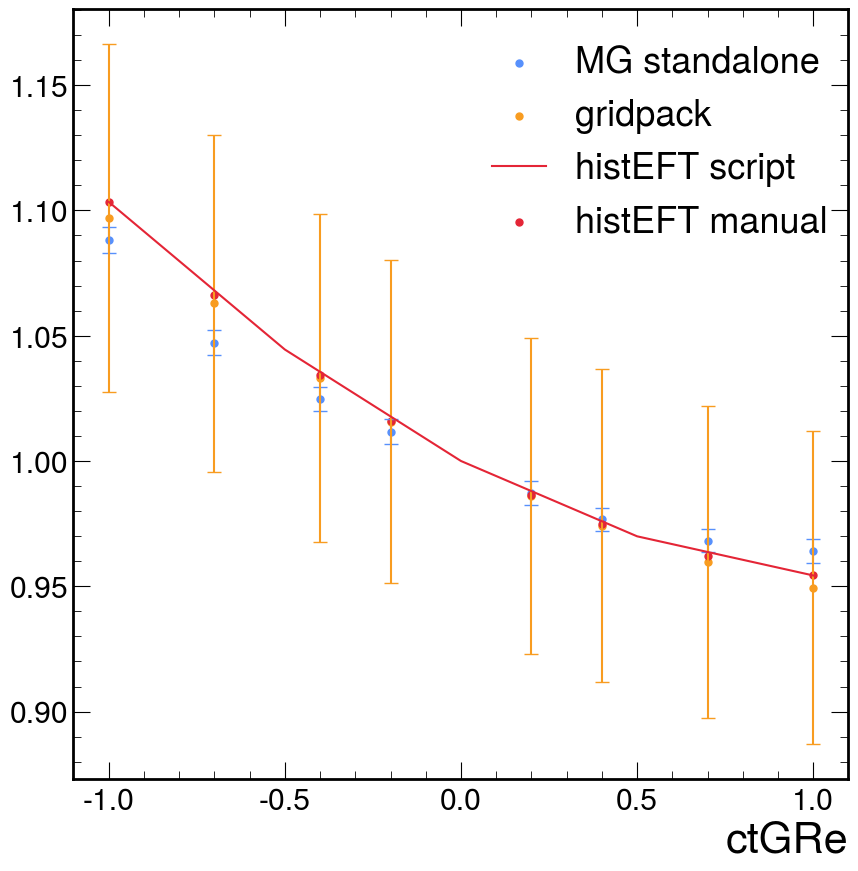

In [110]:
wc = 'ctGRe'

standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.63, 0.01903)
gridpack_dict = make_scatter_list_oneWC(gridpack[wc], 5.92199011614, 0.266680304541)

fig, ax = plt.subplots()
ax.scatter(standalone_dict[0], standalone_dict[1], label = "MG standalone")
ax.errorbar(standalone_dict[0], standalone_dict[1], yerr = standalone_dict[2], xerr = None, capsize=5, ls='none')
ax.scatter(gridpack_dict[0], gridpack_dict[1], label = "gridpack")
ax.errorbar(gridpack_dict[0], gridpack_dict[1], yerr = gridpack_dict[2], xerr = None, capsize=5, ls='none')

ax.plot(small_sow_dict[0], small_sow_dict[1], label="histEFT script")
ax.scatter([-1.0, -0.7, -0.4, -0.2, 0.2, 0.4, 0.7, 1.0], vals, label="histEFT manual")

ax.legend(loc='best', bbox_to_anchor=(1.02, 1.0), fontsize='medium')
ax.set_xlabel(wc, fontsize = 'large')

## Comparing calculated vs reweighted xsecs

In [47]:
orig = "../tW_orig_sow.pkl.gz"
small = "../tW_small_sow.pkl.gz"
medium = "../tW_medium_sow.pkl.gz"
large = "../tW_large_sow.pkl.gz"
savedir = "/afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/1d_quad_all/"

In [50]:
for wc in standAlone.keys():

    orig_dict = make_samples_dict(file=orig, wc_name=wc, wc_max=10.0)
    small_dict = make_samples_dict(file=small, wc_name=wc, wc_max=10.0)
    medium_dict = make_samples_dict(file=medium, wc_name=wc, wc_max=10.0)
    large_dict = make_samples_dict(file=large, wc_name=wc, wc_max=10.0)
    
    standalone_dict = make_scatter_list_oneWC(standAlone[wc], 5.63, 0.01903)
    gridpack_dict = make_scatter_list_oneWC(gridpack[wc], 5.92199011614, 0.266680304541)
    
    fig, ax = plt.subplots()
    ax.scatter(standalone_dict[0], standalone_dict[1], label = "MG standalone")
    ax.errorbar(standalone_dict[0], standalone_dict[1], yerr = standalone_dict[2], xerr = None, capsize=5, ls='none')
    # ax.scatter(gridpack_dict[0], gridpack_dict[1], label = "gridpack")
    # ax.errorbar(gridpack_dict[0], gridpack_dict[1], yerr = gridpack_dict[2], xerr = None, capsize=5, ls='none')

    ax.plot(orig_dict[0], orig_dict[1], label="tW_orig")
    ax.plot(small_dict[0], small_dict[1], label="tW_small")
    ax.plot(medium_dict[0], medium_dict[1], label="tW_medium")
    ax.plot(large_dict[0], large_dict[1], label="tW_large")

    ax.legend(loc='best', bbox_to_anchor=(1.02, 0.5), fontsize='medium')
    ax.set_xlabel(wc, fontsize = 'large')
    fig.show()
    
    figname = f"quad1d_{wc}.pdf"
    fig.savefig(os.path.join(savedir,figname), bbox_inches='tight')
    print(f"saving plot to {os.path.join(savedir, figname)}")
    plt.close(fig)

/tmp/ipykernel_2035385/1035619357.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/1d_quad_all/quad1d_ctGIm.pdf


/tmp/ipykernel_2035385/1035619357.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/1d_quad_all/quad1d_ctGRe.pdf


/tmp/ipykernel_2035385/1035619357.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/1d_quad_all/quad1d_cHQ3.pdf


/tmp/ipykernel_2035385/1035619357.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/1d_quad_all/quad1d_ctWRe.pdf


/tmp/ipykernel_2035385/1035619357.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/1d_quad_all/quad1d_cleQt3Re.pdf


/tmp/ipykernel_2035385/1035619357.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/1d_quad_all/quad1d_cleQt1Re.pdf


/tmp/ipykernel_2035385/1035619357.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/1d_quad_all/quad1d_cQl3.pdf


/tmp/ipykernel_2035385/1035619357.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/1d_quad_all/quad1d_cbWRe.pdf


/tmp/ipykernel_2035385/1035619357.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


saving plot to /afs/crc.nd.edu/user/h/hnelson2/www/tW_plots/1d_quad_all/quad1d_cHtbRe.pdf
